## Task:2 Spam Email Classification 
#### Objective:
To develop a machine learning model that predicts whether an email is spam or not based on its content and metadata.
### Project Overview:
In this project, we will implement various classification techniques to solve the problem of email spam detection. The process will involve several key steps, including data preparation, exploratory data analysis (EDA), model building, evaluation. Our goal is to build an accurate classification model that can reliably distinguish between spam and non-spam emails.

###  Tools Preprationn and Libraries:

In [32]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('emails.csv')
data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [3]:
data['Prediction'].value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [5]:
# check data type
data.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [6]:
# check nan values
data.isna().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

* There is no nan values

In [7]:
# "Now, let's look at the statistical values of our data."
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


 * The statistics information themselves don't indicate a problem

### Data Visualization

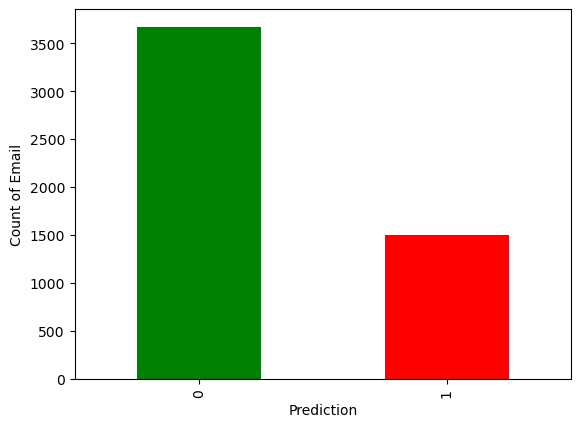

In [8]:
# let's look at the prediction
data['Prediction'].value_counts().plot(kind='bar',color=['green','red'])
plt.xlabel('Prediction')
plt.ylabel('Count of Email');

* 0 represents emails that are predicted not to be spam.
* 1 represents emails that are predicted to be spam.


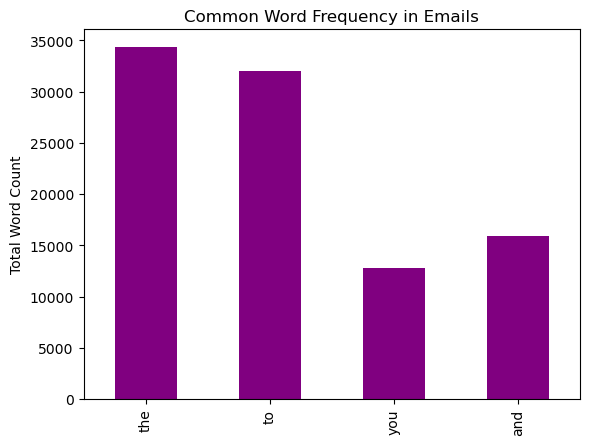

In [9]:
data[['the', 'to', 'you', 'and']].sum().plot(kind='bar', color='purple')
plt.title('Common Word Frequency in Emails')
plt.ylabel('Total Word Count')
plt.show()

* Visualize the frequency of commonly used words like the, you, for, etc. to see how often they occur in emails.

### Model Building:

In [10]:
data = data.drop('Email No.',axis=1)
# Split data
X = data.drop('Prediction',axis=1)
y = data['Prediction']

In [11]:
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [12]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

In [13]:
# Split data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [14]:
# check the shape of the data
print('shape of x_train',X_train.shape)
print('shape of y_train',y_train.shape)
print('shape of x_test',X_test.shape)
print('shape of y_test',y_test.shape)

shape of x_train (4137, 3000)
shape of y_train (4137,)
shape of x_test (1035, 3000)
shape of y_test (1035,)


In [15]:
np.random.seed(7)
# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Support Vector Machine": SVC()
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Make a dictionary to score the model
    model_score = {}
    
    # Looping through each model
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Evaluate the model and store the score in the dictionary
        model_score[name] = model.score(X_test, y_test)
        
        
    return model_score

# Now you can call the fit and score function
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regression': 0.9719806763285024,
 'Decision Tree Classifier': 0.9265700483091788,
 'Support Vector Machine': 0.8173913043478261}

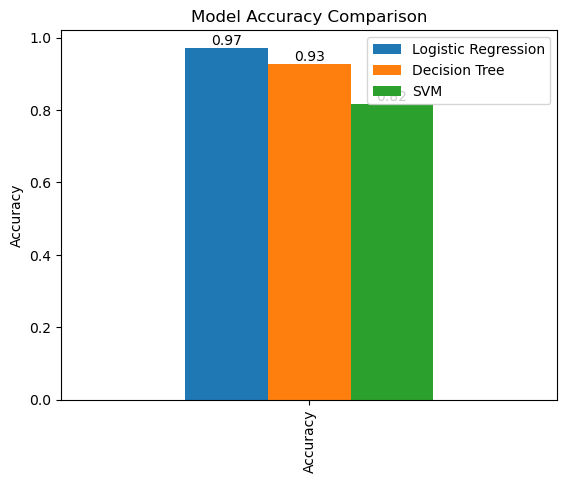

In [16]:
# Accuracy scores
model_scores = {
    'Logistic Regression': 0.9719,
    'Decision Tree': 0.92657,
    'SVM': 0.817391
}
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
ax = model_compare.plot.bar()
# Add accuracy values on top of the bars
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


### Model Evaluation:

In [19]:
#This will calculate the Accuracy, Precision, Recall, and F1 Score for each model one by one:
# Logistic Regression
y_pred_lr = models['Logistic Regression'].predict(X_test)
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr, average='weighted'):.4f}\n")

# Decision Tree
y_pred_dt = models['Decision Tree Classifier'].predict(X_test)
print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_dt, average='weighted'):.4f}\n")

# Support Vector Machine (SVM)
y_pred_svm = models['Support Vector Machine'].predict(X_test)
print("Support Vector Machine:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm, average='weighted'):.4f}")


Logistic Regression:
Accuracy: 0.9720
Precision: 0.9722
Recall: 0.9720
F1 Score: 0.9721

Decision Tree Classifier:
Accuracy: 0.9266
Precision: 0.9266
Recall: 0.9266
F1 Score: 0.9266

Support Vector Machine:
Accuracy: 0.8174
Precision: 0.8340
Recall: 0.8174
F1 Score: 0.7913


* Logistic Regression performs the best overall with high accuracy, precision, recall, and F1 score (all around 0.97).
* Decision Tree has slightly lower scores (all 0.93), still performing well.
* Support Vector Machine (SVM) has the lowest accuracy (0.82), with lower F1 score (0.79), indicating it's less effective at balancing precision and recall compared to the other models.
  
In short, Logistic Regression is the best model here based on all metrics.

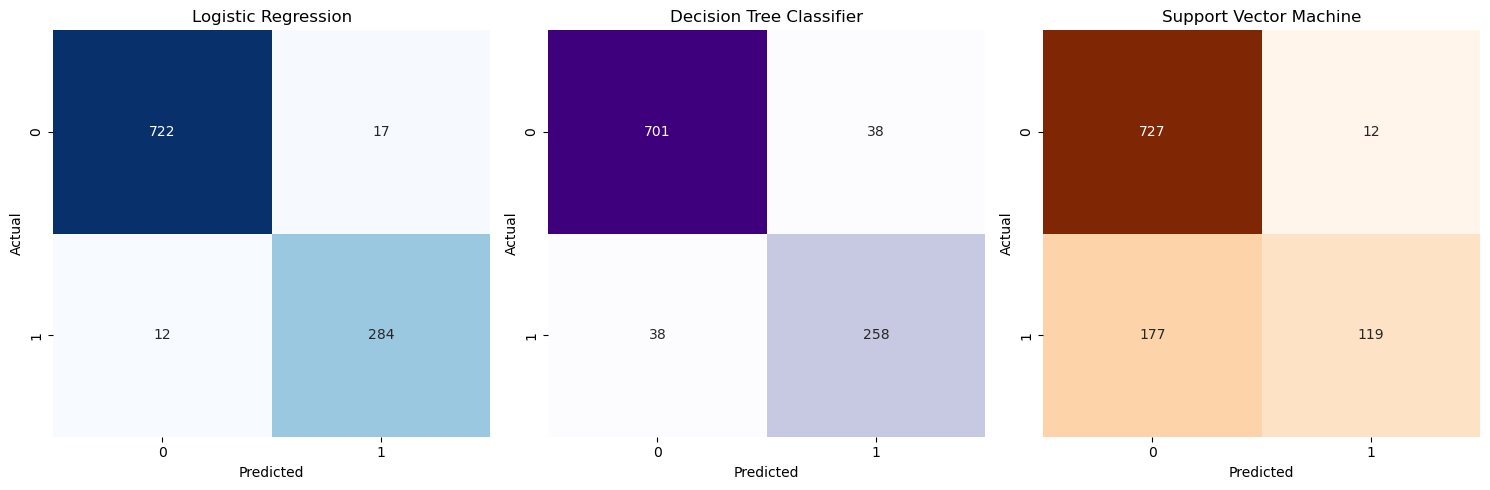

In [29]:
from sklearn.metrics import confusion_matrix
# Generate confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrices side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Confusion matrix for Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion matrix for Decision Tree Classifier
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Purples", cbar=False, ax=axes[1])
axes[1].set_title('Decision Tree Classifier')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Confusion matrix for Support Vector Machine
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Oranges", cbar=False, ax=axes[2])
axes[2].set_title('Support Vector Machine')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()


* Logistic Regression has the best overall performance with the least number of classification errors.
* The Decision Tree struggles with both false positives and false negatives but is still relatively balanced.
* The Support Vector Machine has the most trouble with false negatives, missing a lot of positive cases.

In [36]:

# Predict labels using Logistic Regression model
y_pred_lr = models['Logistic Regression'].predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred_lr, target_names=['Not Spam', 'Spam'], output_dict=True)

# Print the classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr, target_names=['Not Spam', 'Spam']))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    Not Spam       0.98      0.98      0.98       739
        Spam       0.94      0.96      0.95       296

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



* Logistic Regression shows strong performance overall, especially in the "Not Spam" category.
 High precision, recall, and F1 scores for both classes indicate that the model is reliable.
 The overall accuracy of 97% demonstrates that the model performs well.

### Conclusion:
  These results indicate that your Logistic Regression model is effectively classifying emails as spam or not spam.